<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:60px">
<center>
<div>
    <center>
    <h1>Laboratorio 1 Estadística Computacional</h1>
    </center>
</div>
<div>
    <br>
    <h5> Giorgio Pellizzari - 201473599-5 - Malla Nueva</h5>
    <h5> Felipe Vega - 201473511-1 - Malla Nueva</h5>
    <h6>9 de abril del 2018</h6>
</div>
</center>

# Tiroteos en USA

Para trabajar con el dataset entregado, lo primero es eliminar las columnas con datos que no utilizarán en el estudio. Por esta razón se eliminan las columnas **localidad**, **area**, **raza**, **sexo**, **latitud**, **longitud**, **trabajada**, **trabaja.donde** y **resumen**. Además, se transforma la columna fecha para que sus datos sean de tipo _**DateTime**_ y no de tipo _**String**_.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('usashooting.csv', encoding='latin-1')
dataset.drop('localidad',1, inplace=True)
dataset.drop('area',1, inplace=True)
dataset.drop('raza',1, inplace=True)
dataset.drop('sexo',1, inplace=True)
dataset.drop('latitud',1, inplace=True)
dataset.drop('longitud',1, inplace=True)
dataset.drop('trabajaba',1, inplace=True)
dataset.drop('trabaja.donde',1, inplace=True)
dataset.drop('resumen',1, inplace=True)
dataset['fecha'] = pd.to_datetime(dataset['fecha'])

Dado que se necesita sacar los promedios de _**tiroteos, muertos y heridos**_ desde el año _1983_ se obtiene un subset de datos, donde se tienen dichas columnas para todos los tiroteos desde ese año. Finalmente se puede calcular el promedio de tiroteos por año sumando todos los tiroteos del subset y dividiendolo por la cantidad de años que considera dicho dataset. En el caso los muertos y heridos durante ese período de tiempo, se suman todos los muertos/heridos y se dividen por la cantidad de años analizados.

In [3]:
subDataDesde1983 = dataset[['fecha', 'muertos', 'heridos']].query('fecha.dt.year >= 1983')
cantidadDeAños = len(subDataDesde1983.groupby(subDataDesde1983['fecha'].dt.year))
promedioTiroteos = len(subDataDesde1983)/cantidadDeAños
promedioMuertos = subDataDesde1983['muertos'].sum()/cantidadDeAños
promedioHeridos = subDataDesde1983['heridos'].sum()/cantidadDeAños
print("Promedio de tiroteos por año, entre 1983 y 2017: "+str(promedioTiroteos))
print("Promedio de muertos en tiroteos por año, entre 1983 y 2017: " + str(promedioMuertos))
print("Promedio de heridos en tiroteos por año, entre 1983 y 2017: " + str(promedioHeridos))


Promedio de tiroteos por año, entre 1983 y 2017: 8.885714285714286
Promedio de muertos en tiroteos por año, entre 1983 y 2017: 39.22857142857143
Promedio de heridos en tiroteos por año, entre 1983 y 2017: 54.48571428571429


Se observa que el promedio de tiroteos por año, considerando los datos entre 1983 y 2017, es de aproximadamente 9 tiroteos. El promedio de heridos por año es mayor al promedio de muertos por año, con aproximadamente 54 y 39 afectados respectivamente.

Como se necesita analizar la cantidad de muertos y heridos dependiendo del estado mental del perpetuador, se genera un subset con dichas columnas, dejando de lado los tiroteos donde no se tiene registro del estado mental. Para comparar, se utilizan boxplot, donde se grafican las cajas para la cantidad de heridos y para la cantidad de muertos para los tiroteos donde el perpetuador tiene problemas mentales y cuando no los tiene.

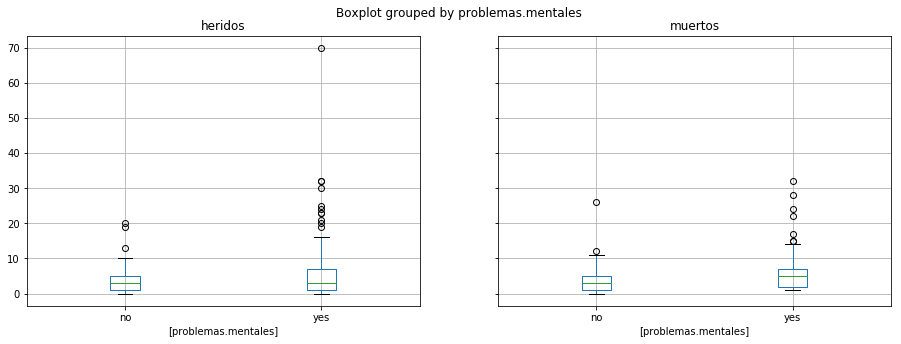

In [4]:
subDataMental = dataset[['muertos', 'heridos','problemas.mentales']]
subDataMental.loc[:,'problemas.mentales'] = subDataMental.loc[:,'problemas.mentales'].str.lower()
subDataMental.loc[:,'problemas.mentales'].fillna("unknown",inplace=True)
subDataMental = subDataMental[subDataMental['problemas.mentales'] != 'unclear']
subDataMental = subDataMental[subDataMental['problemas.mentales'] != 'unknown']


color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians = 'DarkBlue', caps='Gray')

plt.figure()
subDataMental.boxplot(by='problemas.mentales', figsize=(15, 5))
plt.show()



Se puede observar que en los casos donde se presentan atacantes con problemas mentales hay una mayor presencia de _**outliers**_ en los heridos y los muertos sobre el bigote superior. Esto indica que cuando se tienen atacantes con problemas mentales se dan más casos extremadamente violentos, donde la cantidad de víctimas es grande.

Dado que no se aprecia las relaciones entre las cajas de los boxplot, se grafican nuevos boxplot pero sin colocar los _**outliers**_ (pero considerandolos igualmente para el cálculo de los cuartiles).

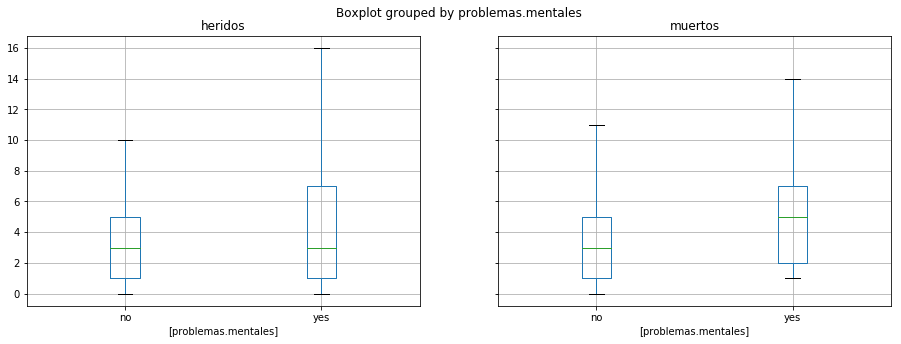

In [5]:
plt.figure()
subDataMental.boxplot(by='problemas.mentales', figsize=(15, 5), showfliers=False)
plt.show()

En el boxplot para los heridos, se puede observar que la mediana para el estado mental es prácticamente la misma, para el caso de los terceros cuartiles se nota una mayor diferencia, con preferencia a tener más heridos en los casos de atacantes con problemas mentales. Las diferencias se notan más en el caso de los muertos, donde al observar las posiciones de los cuartiles, se puede ver que en el 50% de los tiroteos donde el atacante no está sano mentalmente hay mas muertos que en el 75% de los tiroteos donde el atacante no tiene problemas mentales. Ambos gráficos indican que cuando se tienen atacantes con problemas mentales hay más afectados, notándose esta diferencia de mejor manera en el caso de los muertos en estos incidentes.

Por otro lado, se desea analizar los tiroteos ocurridos en los períodos de ejercicio de dos presidentes de los Estados Unidos, George W. Bush (20/01/2001 - 20/01/2009) y Barack Obama (20/01/2009 - 20/01/2017). Por esta razón de generan dos subset de datos, con los tiroteos ocurridos en dichos períodos respectivamente. 

El día 20/01/2009 se contabilizará como parte del gobierno de Bush. Además, no se considerarán las columnas _**localidad, area, raza, sexo, latitud, longitud, trabajaba, trabajaba.donde y resumen**_ para realizar los subset. También se pasan los campos _**motivo y problemas.mentales**_ a minúsculas.

El subset con los tiroteos ocurridos durante el período de ejercicio de George W. Bush está almacenado en la variable _**periodoBush**_ y el subset con los tiroteos producidos en el período de Barack Obama se encuentran en la variable _**periodoObama**_.

In [6]:
periodoBush = dataset.query("fecha >= '20-01-2001' and fecha <= '20-01-2009'")
periodoObama = dataset.query("fecha > '20-01-2009' and fecha <= '20-01-2017'")

periodoBush.loc[:,'problemas.mentales'] = periodoBush.loc[:,'problemas.mentales'].str.lower()
periodoBush.loc[:,'motivo'] = periodoBush.loc[:,'motivo'].str.lower()
periodoObama.loc[:,'problemas.mentales'] = periodoObama.loc[:,'problemas.mentales'].str.lower()
periodoObama.loc[:,'motivo'] = periodoObama.loc[:,'motivo'].str.lower()


Se obtienen el número de víctimas de cada período sumando los valores de la columna _**victimas.totales**_ para cada período. 

In [7]:
print("Las victimas totales del período de Bush es: "+ str(periodoBush['victimas.totales'].sum())+ " en un total de "+ str(len(periodoBush))+" tiroteos.")
print("Las victimas totales del período de Obama es: " + str(periodoObama['victimas.totales'].sum())+ " en un total de " + str(len(periodoObama))+ " tiroteos")

Las victimas totales del período de Bush es: 336 en un total de 35 tiroteos.
Las victimas totales del período de Obama es: 1475 en un total de 198 tiroteos


Se obtiene que las víctimas durante el período de Bush alcanzaron un total de 336 afectados en un total de 35 tiroteos. El el período de Obama se alcanzó un total de 1475 víctimas en 198 tiroteos. 

Para ver cual fue la mayor causa de los ataques de cada período se generan dos gráficos de barras (1 por período), graficando la frecuencia con la que aparece cada motivo del subset de datos.

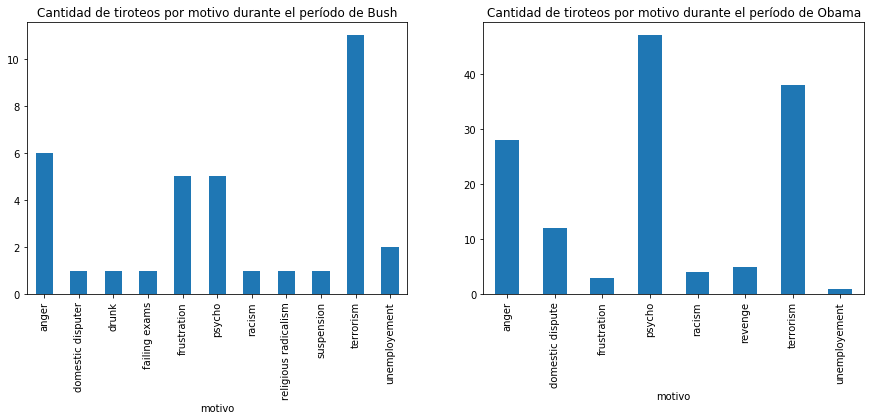

In [8]:
porMotivoBush = periodoBush.groupby(['motivo'])
porMotivoObama = periodoObama.groupby(['motivo'])



fig, axes = plt.subplots(nrows=1, ncols=2)
porMotivoBush.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Bush", ax=axes[0],figsize=(15, 5))
porMotivoObama.size().plot(kind='bar', title="Cantidad de tiroteos por motivo durante el período de Obama", ax=axes[1],figsize=(15, 5))
plt.show()

Como se puede observar en los gráficos anteriores, el principal motivo de tiroteos durante la administración de George W. Bush fue el terrorismo. Por otro lado, durante la administración de Barack Obama el principal motivo fueron los ataques realizados por psicópatas.

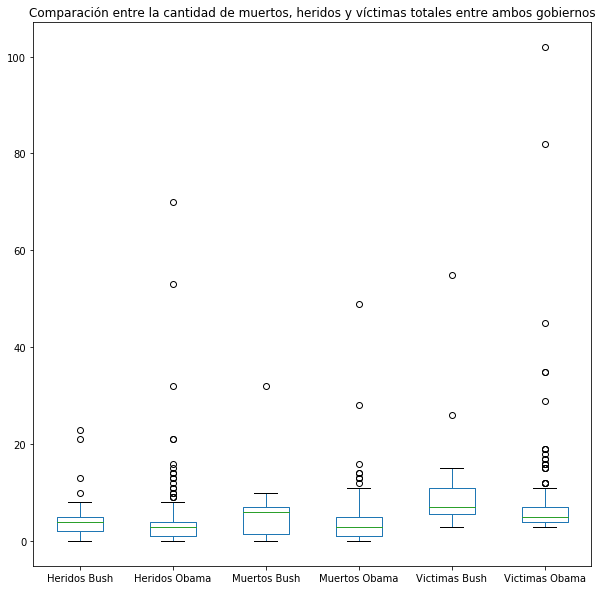

In [9]:
subBush = periodoBush[['muertos','heridos','victimas.totales']]
subBush.rename(columns={'muertos': 'Muertos Bush', 'heridos': 'Heridos Bush', 'victimas.totales': 'Victimas Bush'}, inplace=True)

subObama = periodoObama[['muertos','heridos','victimas.totales']]
subObama.rename(columns={'muertos': 'Muertos Obama', 'heridos': 'Heridos Obama', 'victimas.totales': 'Victimas Obama'}, inplace=True)

concatenacion = pd.concat([subBush, subObama], axis=1)
concatenacion.sort_index(axis=1, inplace=True)

plt.figure()
concatenacion.plot.box(figsize=(10,10), title="Comparación entre la cantidad de muertos, heridos y víctimas totales entre ambos gobiernos")
plt.show()

Bajo inspección simple, se ve que en materia de heridos, muertos y víctimas totales, el gobierno de Bush fue más violento, donde todas las _"cajas"_ de dicho período tienen todos sus cuartiles más altos que la administración de Obama. Sin embargo, se observan más outliers en la administración de Obama, lo que indica que en dicha administración hubieron tiroteos realmente violentos, como por ejemplo, el caso un tiroteo durante la administración Obama que registró más de 100 víctimas totales.

Para analizar de mejor manera las cajas del boxplot, se vuelve a graficar pero limitando los valores del eje _**"y"**_ graficados.

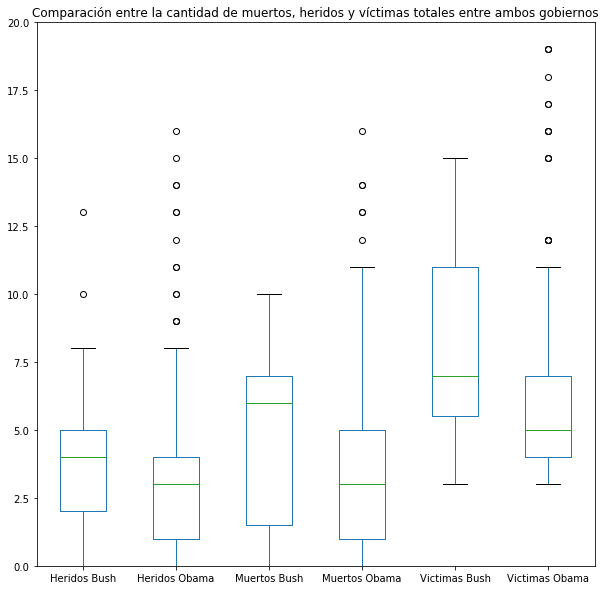

In [10]:
plt.figure()
concatenacion.plot.box(figsize=(10,10), ylim=(0,20), title="Comparación entre la cantidad de muertos, heridos y víctimas totales entre ambos gobiernos")
plt.show()

Al observar el nuevo gráfico se ratifica la observación entregada anteriormente, en todos los casos analizados, en el 50% de los tiroteos de la administración de Bush hubo más afectados en todas las categorías que en el 75% de los tiroteos bajo la administración Obama. Esto se ve reflejado en que las medianas del gobierno de Bush están a la misma altura (o sobre) que todos los terceros cuartiles de las cajas del gobierno de Obama.

Dada la presencia de outliers, principalmente en la administración Obama, se calculan los promedios de muertos, heridos y víctimas por tiroteo en ambas administraciones, con el objetivo de ver si esta medida de tendencia central cambia las conclusiones obtenidas a partir de una medida de tendencia central robusta frente a valores extremos.

In [11]:
print("Promedio de muertos gobierno de Bush: " + str(subBush['Muertos Bush'].sum()/len(subBush)))
print("Promedio de muertos gobierno de Obama: "+ str(subObama['Muertos Obama'].sum()/len(subObama)))

print("Promedio de heridos gobierno de Bush: " + str(subBush['Heridos Bush'].sum()/len(subBush)))
print("Promedio de heridos gobierno de Obama: " + str(subObama['Heridos Obama'].sum()/len(subObama)))

print("Promedio de víctimas gobierno de Bush: " + str(subBush['Victimas Bush'].sum()/len(subBush)))
print("Promedio de víctimas gobierno de Obama: " + str(subObama['Victimas Obama'].sum()/len(subObama)))

Promedio de muertos gobierno de Bush: 5.285714285714286
Promedio de muertos gobierno de Obama: 3.792929292929293
Promedio de heridos gobierno de Bush: 4.685714285714286
Promedio de heridos gobierno de Obama: 4.005050505050505
Promedio de víctimas gobierno de Bush: 9.6
Promedio de víctimas gobierno de Obama: 7.44949494949495


Como se puede observar en los valores obtenidos, a pesar de la presencia de outliers en el subset del gobierno de Obama se siguen obteniendo promedios más altos durante la administración de Bush. 

En conclusión, la cantidad de afectados por tiroteos es mayor durante la administración de George W. Bush, a pesar de la presencia de outliers y la cantidad de tiroteos producidos en el período presidencial de Barack Obama.

# Cálculo del área bajo la curva utilizando el método de Montecarlo

Para obtener el área bajo la curva de la campana de Gauss en [-4 , 4] se calcula la integral en dicho intervalo de la función que define la campana.

$$
A = \int_{-4}^{4} \frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}} dx
$$

Realizando el cambio de variable $y = \frac{x - (-4)}{4-(-4)}$, $dx = dy(4-(-4))$ se obtiene la siguiente integral.

$$
A = \int_{0}^{1} \frac{e^{\frac{-(8y - 4)^2}{2}}}{\sqrt{2\pi}}*8 dy
$$

Una vez realizado el cambio de variable, el método de Integración de Montecarlo indica que si se generan $x_i \hspace{0.5cm} i \in 1,...,n$ números aleatorios bajo una distribución uniforme, la integral anterior se puede aproximar con la siguiente fórmula.

$$
\frac{8}{n} \sum_{i=1}^{n}\frac{e^{\frac{-(8x_i - 4)^2}{2}}}{\sqrt{2\pi}} \approx \int_{-4}^{4} \frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}} dx
$$

Además, mientras más grande sea $n$, mejor es la aproximación, lo que quiere decir que si se calcula el límite cuando $n \to \infty$ de la sumatoria anterior se obtiene exactamente el valor de la integral.

Dado el método de Montecarlo, se procede a calcular una aproximación del área de la Campana de Gauss, para esto se generan números pseudo-aleatorios siguiendo una distribución uniforme. Se utiliza una semilla para que los resultados obtenidos sean los mismos cada vez que se ejecute la aproximación y así no varíen los resultados del análisis realizado.

In [96]:
iteraciones = []
iteraciones2 = []
areasCalculadas = []
areasCalculadas2 = []
np.random.seed(97)

for j in range(1,7500, 100):
    sumatoria = 0
    for i in range(j):
        sumatoria += (np.exp((-(8*np.random.rand() - 4)**2)/2))/((2*np.pi)**(1/2))
    areaBajoLaCurva = sumatoria*(8/j) 
    areasCalculadas.append(areaBajoLaCurva)
    iteraciones.append(j)

for j in range(1,250000, 5000):
    sumatoria = 0
    for i in range(j):
        sumatoria += (np.exp((-(8*np.random.rand() - 4)**2)/2))/((2*np.pi)**(1/2))
    areaBajoLaCurva = sumatoria*(8/j) 
    areasCalculadas2.append(areaBajoLaCurva)
    iteraciones2.append(j)


sumatoria = 0    
for i in range(250000):
    sumatoria += (np.exp((-(8*np.random.rand() - 4)**2)/2))/((2*np.pi)**(1/2))
areaBajoLaCurva = sumatoria*(8/250000) 

print("El área bajo la curva de la Campana de Gauss es de: " + str(areaBajoLaCurva))

#plt.plot(iteraciones, areasCalculadas)
#plt.show()


El área bajo la curva de la Campana de Gauss es de: 0.999952576973


Como se sabe, el área bajo la curva de una campana de Gauss es de 1. De esta manera es posible obtener el error cuadrático de la aproximación obtenida

In [97]:
print("Error Cuadrático: " + str(((1-areaBajoLaCurva)**2)*100) +"%") 

Error Cuadrático: 2.24894347471e-07%


Se tiene un error cuadrático porcentual del orden de $10^{-7}$, lo que indica que se obtuvo una buena aproximación del área de la campana.

Por último, se realizan gráficos 2 gráficos para observar la convergencia del método. Uno considerando $n = 7500$ y el otro considerando $n = 250000$.

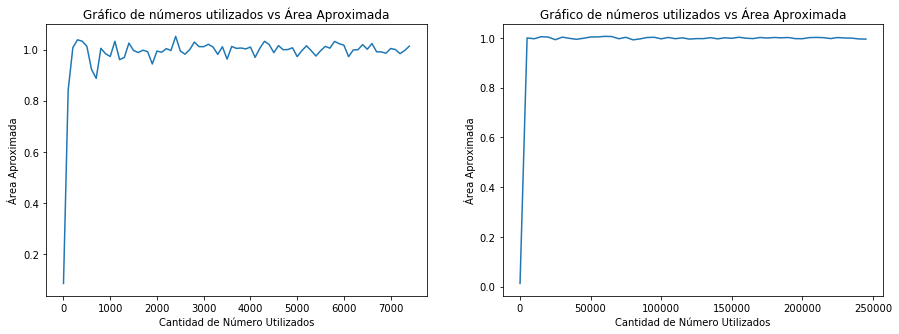

In [95]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title("Gráfico de Números Utilizados vs Área Aproximada")
plt.plot(iteraciones, areasCalculadas)
plt.xlabel("Cantidad de Números Utilizados")
plt.ylabel("Área Aproximada")
plt.subplot(122)
plt.plot(iteraciones2, areasCalculadas2)
plt.title("Gráfico de Números utilizados vs Área Aproximada")
plt.xlabel("Cantidad de Números Utilizados")
plt.ylabel("Área Aproximada")
plt.show()

En el primer gráfico se puede observar como va variando el valor del área entregada por la aproximación. Si bien todos los valores pasase encuentran cercanos a uno no se aprecia una clara convergencia a dicho valor. Al observar el segundo gráfico se observa de mejor manera la convergencia al valor exacto.

Esto nos indica que el método utilizado converge correctamente al valor exacto de